In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gc
import cPickle as pickle
import sys
sys.path.append('../../mainstream/src/scheduler')
sys.path.append('../../mainstream/src/scheduler/types')
sys.path.append('../../mainstream/data')
import scheduler_util
from collections import defaultdict
%matplotlib inline

In [2]:
run_id = "graph-b200"
# run_id = "graph-b100"

In [3]:
stats = []
gc.disable()
for i in range(4):
    try:
        with open('../../mainstream/data/{}-{}.pkl'.format(run_id, i), 'rb') as f:
            stats.append(pickle.load(f))
    except Exception:
        pass
gc.enable()
assert len(stats) > 0

In [4]:
stats[0][0]

{<scheduler_util.SharedStem at 0x108d17ad0>: [((0.051362766889078704,
    0.051362766889078704),
   17.802900000000005,
   {'prev': None, 'prev_stem': None, 'unit': (App 0: 1 FPS, 3 frozen) })],
 <scheduler_util.SharedStem at 0x108d17d10>: [((0.051362766889078704,
    0.051362766889078704),
   2.4171000000000005,
   {'prev': None, 'prev_stem': None, 'unit': (App 0: 1 FPS, 33 frozen) })],
 <scheduler_util.SharedStem at 0x108d17d90>: [((0.049562424746318334,
    0.049562424746318334),
   2.2683,
   {'prev': None, 'prev_stem': None, 'unit': (App 0: 1 FPS, 39 frozen) })],
 <scheduler_util.SharedStem at 0x108d17e10>: [((0.049562424746318334,
    0.049562424746318334),
   2.041499999999999,
   {'prev': None, 'prev_stem': None, 'unit': (App 0: 1 FPS, 45 frozen) })],
 <scheduler_util.SharedStem at 0x108d17e90>: [((0.049562424746318334,
    0.049562424746318334),
   1.8176999999999992,
   {'prev': None, 'prev_stem': None, 'unit': (App 0: 1 FPS, 51 frozen) })],
 <scheduler_util.SharedStem at 0x1

In [5]:
all_edges = set()
for dp, edges in stats[1:]:
    all_edges |= edges
    print(len(edges), len(all_edges))

(5169, 5169)
(69675, 74844)
(325091, 399935)


In [6]:
nodes = set()
for a, b in all_edges:
    nodes.add(a)
    nodes.add(b)

In [7]:
def id_stem(stem_):
    if stem_ is None:
        return 'root'
    coststr = ""
    if not isinstance(stem_, tuple):
        coststr = str(stem_.cost) + "_"
        stem_ = stem_.stem
    assert len(stem_) == len(set(x[0] for x in stem_))
    # TODO: add cost of stem in ID
    return '{}{}_{}-{}'.format(coststr, len(stem_), len(set(x[1] for x in stem_)), str(stem_).replace(",","."))
#     return '{}_{}-{}'.format(len(stem_), len(set(x[1] for x in stem_)), hex(hash((4131,) + stem_ + (4321,123)))[-16:])

node_ids = {}
for node in nodes:
    if id_stem(node) in node_ids:
        assert node.stem == node_ids[id_stem(node)].stem
#         print node.stem, node_ids[id_stem(node)].stem
    node_ids[id_stem(node)] = node
# assert len(nodes) == len(node_ids), (len(nodes), len(node_ids))
unique_edges = set((a, b) for a, b in all_edges)
# unique_edges = set((a.stem, b.stem) for a, b in all_edges)
for a in stats[0][0]:
    unique_edges.add((None, a))

In [8]:
with open('../output/mainstream/stems/{}-edges.csv'.format(run_id), 'w') as f:
    for a, b in unique_edges:
        f.write(id_stem(a) + ',' + id_stem(b) + '\n')

In [9]:
weights = {k: 0 for k in node_ids}
weights['root'] = 0
cnt = 0
for dp, edges in stats:
    for stem, v in dp.iteritems():
        weights[id_stem(stem)] += len(v)
        cnt += len(v)

In [10]:
with open('../output/mainstream/stems/{}-nodes.csv'.format(run_id), 'w') as f:
    f.write('id,label,weight\n')
    for node in node_ids:
        f.write('{},{},{}\n'.format(node, node, weights[node]))

In [11]:
edge_weights = defaultdict(int)
cnt2 = 0
for dp, edges in stats:
    for stem, v in dp.iteritems():
        for vv in v:
            info = vv[2]
            edge_weights[(id_stem(info['prev_stem']), id_stem(stem))] += 1
            cnt2 += 1
print cnt, cnt2

171022 171022


In [14]:
incoming = set()
chosen_node = None
for a, b in unique_edges:
    if id_stem(b) == "83.0808_1_1-((81. 4).)":
        chosen_node = b
        incoming.add(id_stem(a))
# print incoming

In [19]:
len(incoming)
chosen_node

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(1, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(1, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)

(2, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(2, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(2, 1)
(2, 1)
(3, 1)
(1, 1)
(1, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(1, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(2, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(3, 1)
(1, 1)
(3, 1)
(1, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)
(2, 1)
(3, 1)
(3, 1)

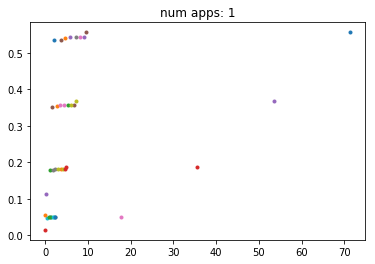

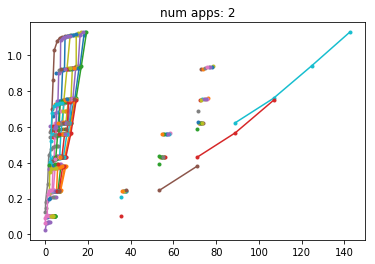

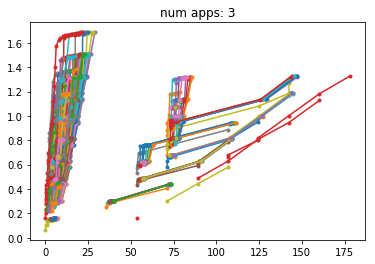

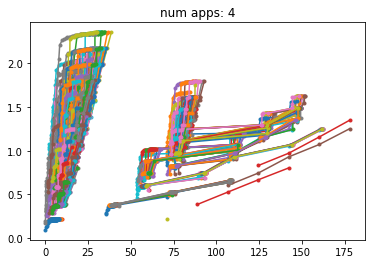

In [21]:
for i, (dp, _) in enumerate(stats):
    plt.figure()
    for stem, v in dp.iteritems():
        if id_stem(stem) in incoming:
            print(len(stem), len(chosen_node))
#             print 'num apps:', i, 'id_stem', id_stem(stem)
#             print len(v)
            pts = [(vv[1], vv[0][0]) for vv in v]
#             print(pts) 
            x, y = zip(*pts)
            plt.plot(x, y, '.-')
#             print
    plt.title('num apps: {}'.format(i+1))
#     plt.xlim(None, 0)

In [13]:
with open('../output/mainstream/stems/{}-edges_weighted.csv'.format(run_id), 'w') as f:
    f.write('source,target,weight\n')
    for a, b in unique_edges:
        f.write(id_stem(a) + ',' + id_stem(b) + ',' + str(edge_weights[(id_stem(a), id_stem(b))]) + '\n')

with open('../output/mainstream/stems/{}-edges_weighted_scaled.csv'.format(run_id), 'w') as f:
    f.write('source,target,weight,weight_original,weight_a,weight_b\n')
    for a, b in unique_edges:
        weight = edge_weights[(id_stem(a), id_stem(b))]
        f.write('{},{},{:g},{},{},{}\n'.format(id_stem(a), id_stem(b), float(weight) / weights[id_stem(b)], weight, weights[id_stem(a)], weights[id_stem(b)]))

KeyboardInterrupt: 

In [ ]:
from collections import Counter
stem_lens = Counter()
for stem in nodes:
    stem_lens[len(stem.stem)] += 1
stem_lens